# Nom: SIDIBE    Prénom: Moussa                  Filière: Data Science

# Implementation de la methodes de Black et Scholes

In [12]:
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

class Black_Scholes:
    
    #Constructeur pour initialiser
    
    def __init__(self,maturite=1,prix_exercice=0.5,taux_interet=0.05,volatilite=0.2,stockMax=1,Nt=20,Nx=20):
        self.maturite=maturite
        self.prix_exercice=prix_exercice
        self.taux_interet=taux_interet
        self.volatilite=volatilite
        self.Xmax=stockMax
        self.Nt=Nt
        self.Nx=Nx
        self.dx=self.Xmax/float(self.Nx)
        self.dt=self.maturite/self.Nt
        
    #Calcul des coefficients
    def a(self,j):
        return -(1/2)*j**2*self.volatilite**2*self.dt/self.dx
    def b(self,j):
        return 1+self.dt*((1/2)*j**2*self.volatilite**2+(1-j)*self.taux_interet)
    def c(self,j):
        return self.dt*(j*self.taux_interet-(1/2)*j**2*self.volatilite**2)
    
    #La fonction qui donnera notre output (la courbe)

    def tracer(self,absc,ord):
            #for i in range(0,self.Nt-1):
            pl.plot(absc,ord[:,1])
            pl.grid()
            pl.title("Variation du prix de l'option")
            pl.xlabel("action X")
            pl.ylabel("Option $u(x,t)$")
            pl.show()

    def plot_surface(self, X, Y,Z):
        fig = figure()
        ax = Axes3D(fig)
        X, Y = np.meshgrid(X, Y)
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='winter')     
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$T-t$')
        ax.set_zlabel(r'$U(x,t)$')
        pl.show()

    #La fonction qui nous permettra de determiner les U(x,t)  
    
    def U(self,V,j):
        return self.a(j)*V[j+1]+self.b(j)*V[j]+self.c(j)*V[j-1]
    
    def resolution(self):
        X=np.zeros(self.Nx+1)
        T=np.zeros(self.Nt+1)
        sous_adjacant=np.zeros(self.Nx+1)
        X[self.Nx]=self.Xmax
        
        #calcul du prix de l'actif sous-jacent
        
        for i in range(self.Nx):
            X[i]=i*self.dx
            sous_adjacant[i]=max(self.prix_exercice-X[i],0)
        
        resultat=np.zeros((self.Nx+1,self.Nt+1))
        
        # Le calcul de la solution pour chaque instant dt rangé dans la matrice resultat dans les colonnes
        
        for j in range(0,self.Nt):
            T[j]=j*self.dt
            resultat[0,j] = self.prix_exercice*np.exp(self.taux_interet*(T[j]-self.maturite))
            #resultat[self.Nx,j] = self.Xmax - self.prix_exercice *np.exp(-self.taux_interet * self.dt * (self.maturite-T[j]))
            for i in range(1, self.Nx-1):
                resultat[i,j] = self.a(i) * self.U(sous_adjacant,i + 1) + self.b(i) * self.U(sous_adjacant,i )+ self.c(i)*self.U(sous_adjacant,i - 1)
        
        #Le tracé du résultat
 
        self.tracer(X,resultat)    
        self.plot_surface(X,T,resultat)
        




# Exemple d'application sur le groupe de Danone

# Les paramètres sont rangés comme suit: maturite, prix d'exercice,  taux_interet_without_risk, volatilité, sous-jacant initiale, nombre subdivision de maturite, nombre subdivision de sous-jacant  

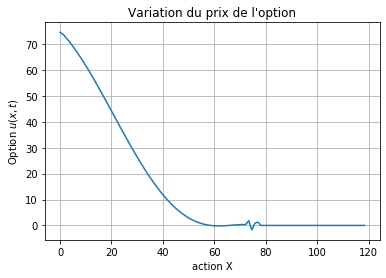

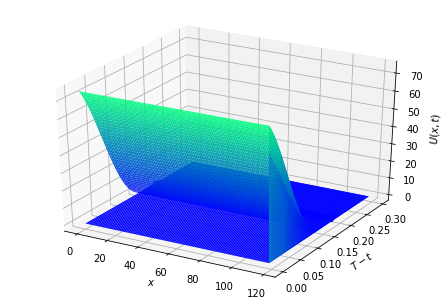

None


In [13]:
C=Black_Scholes(0.3,75,0.02,0.5343,118.40,100,100)
print(C.resolution())

# Exemple 2

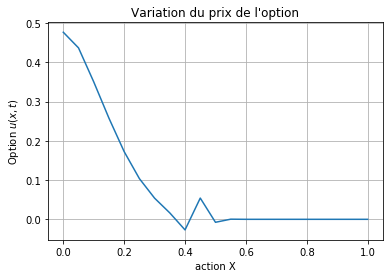

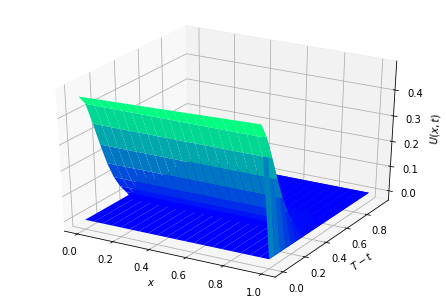

None


In [65]:
C=Black_Scholes(1,0.5,0.05,0.2,1,20,20)
print(C.resolution())

# Implementation des méthodes numériques de resolution des EDP dans le chapitre I de Calcul scientifique II 

Ci-dessous on a l'inplementation des methodes dans le chapitre I des EDP chacune
illustrer la même equation differentielle de prémier ordre pour voir directement la précision des uns sur les autres

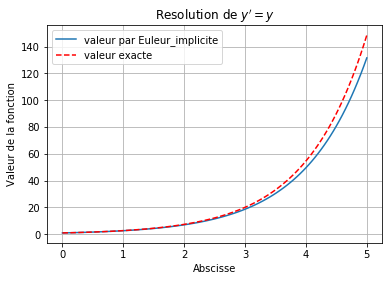

In [40]:
import matplotlib.pyplot as pl
import numpy as np

def f(t,y):
    return y

def Euleur_explicite(f,y0,t0,T,N):
    h=(T-t0)/N
    Y=[y0]
    X=[t0]
    t=t0
    y=y0
    while(t+h<=T):
        y=y+h*f(t,y)
        t=t+h
        Y.append(y)
        X.append(t)
    return (X,Y)


xx=Euleur_explicite(f,1,0,5,100)[0]
yy=Euleur_explicite(f,1,0,5,100)[1]
pl.plot(xx,yy,label="valeur par Euleur_implicite")

t=np.linspace(0,5,100)
pl.plot(t,np.exp(t),'r--',label="valeur exacte")
pl.title("Resolution de $y'=y$")
pl.grid()
pl.legend()
pl.xlabel("Abscisse")
pl.ylabel("Valeur de la fonction")
pl.show()

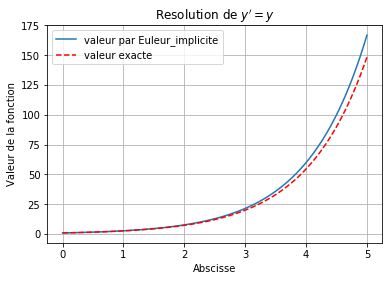

In [41]:
def f(t,y):
    return y

def Euleur_implicite(f,y0,t0,T,N):
    h=(T-t0)/N
    Y=[y0]
    X=[t0]
    t=t0
    y=y0
    while(t+h<=T):
        y1=y+h*f(t,y)
        y=y+h*f(t+h,y1)
        t=t+h
        Y.append(y)
        X.append(t)
    return (X,Y)


xx=Euleur_implicite(f,1,0,5,100)[0]
yy=Euleur_implicite(f,1,0,5,100)[1]
pl.plot(xx,yy,label="valeur par Euleur_implicite")

t=np.linspace(0,5,100)
pl.plot(t,np.exp(t),'r--',label="valeur exacte")
pl.title("Resolution de $y'=y$")
pl.grid()
pl.legend()
pl.xlabel("Abscisse")
pl.ylabel("Valeur de la fonction")
pl.show()

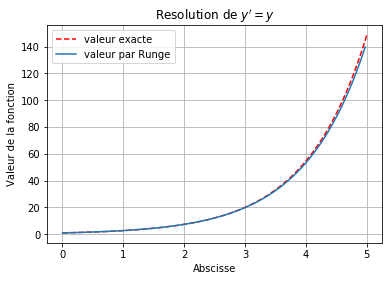

In [42]:
def f(t,y):
    return y

def Runge(f,y0,t0,T,N):
    h=(T-t0)/N
    Y=[y0]
    X=[t0]
    t=t0
    y=y0
    while(t+h/2<=T):
        y1=y+(h/2)*f(t,y)
        y2=y+h*f(t+h/2,y1)
        t=t+h/2
        Y.append(y2)
        X.append(t)
        y=y1
        y1=y2
    return (X,Y)
xx=Runge(f,1,0,5,100)[0]
yy=Runge(f,1,0,5,100)[1]
t=np.linspace(0,5,100)
pl.plot(t,np.exp(t),'r--',label="valeur exacte")
pl.plot(xx,yy,label="valeur par Runge")
pl.grid()
pl.title("Resolution de $y'=y$")
pl.xlabel("Abscisse")
pl.ylabel("Valeur de la fonction")
pl.legend()
pl.show()

# Comme vous pouvez le remarquer la précision avancée de methode de Runge comparable à celle d'Euleur 

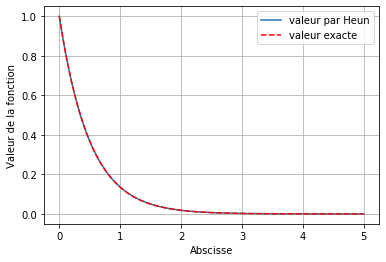

In [36]:
def f(t,y):
    return -2*y

def Heun(f,y0,t0,T,N):
    h=(T-t0)/N
    Y=[y0]
    X=[t0]
    t=t0
    y=y0
    while(t+h<=T):
        k1=h*f(t,y)
        k2=h*f(t+h,y+k1)
        y=y+(k1+k2)/2
        t=t+h
        Y.append(y)
        X.append(t)
    return (X,Y)
xx=Heun(f,1,0,5,100)[0]
yy=Heun(f,1,0,5,100)[1]
pl.plot(xx,yy,label="valeur par Heun")

t=np.linspace(0,5,100)
pl.plot(t,np.exp(-2*t),'r--',label="valeur exacte")
pl.legend()
pl.title("Resolution de $y'=-2*y$")
pl.grid()
pl.xlabel("Abscisse")
pl.ylabel("Valeur de la fonction")
pl.show()

# Remarque: Encore une précision assez impréssionante de la methode Heun

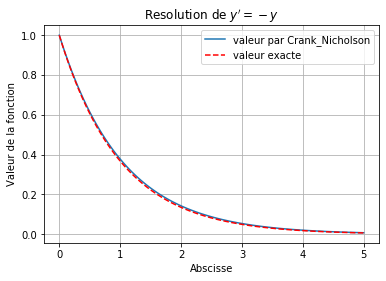

In [43]:
def f(t,y):
    return -y

def Crank_Nicholson(f,y0,t0,T,N):
    h=(T-t0)/N
    Y=[y0]
    X=[t0]
    t=t0
    y=y0
    while(t+h<=T):
        k=y+h*((f(t,y)+f(t+h,y)))
        y=y+h*((f(t,y)+f(t+h,k)))/2
        t=t+h
        Y.append(y)
        X.append(t)
    return (X,Y)
xx=Crank_Nicholson(f,1,0,5,100)[0]
yy=Crank_Nicholson(f,1,0,5,100)[1]
pl.plot(xx,yy,label="valeur par Crank_Nicholson")

t=np.linspace(0,5,100)
pl.plot(t,np.exp(-t),'r--',label="valeur exacte")
pl.title("Resolution de $y'=-y$")
pl.legend()
pl.grid()
pl.xlabel("Abscisse")
pl.ylabel("Valeur de la fonction")
pl.show()

# Pour cette équation diff non linéaire j'ai utilisé la methode prédefini pour permettre la comparaison qui s'est aboutie à une excelente précision de la méthode de Runge_Kutta ci-dessous

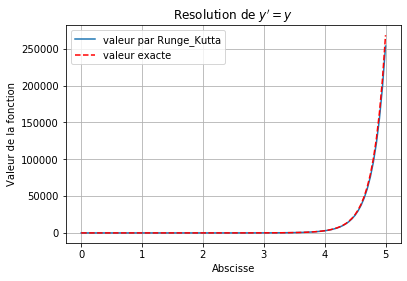

In [45]:
def f(t,y):
    return t*y

def Runge_Kutta_explicite(f,y0,t0,T,N):
    h=(T-t0)/N
    Y=[y0]
    X=[t0]
    t=t0
    y=y0
    while(t+h<=T):
        k1=f(t,y)
        k2=f(t+h,y+h*k1)
        y=y+h*(k1+k2)/2
        t=t+h
        Y.append(y)
        X.append(t)
    return (X,Y)
xx=Runge_Kutta_explicite(f,1,0,5,100)[0]
yy=Runge_Kutta_explicite(f,1,0,5,100)[1]
pl.plot(xx,yy,label="valeur par Runge_Kutta")


y=odeint(f,[1],xx)
pl.plot(xx,y,'r--',label="valeur exacte")

pl.title("Resolution de $y'=t*y$")
pl.legend()
pl.grid()
pl.xlabel("Abscisse")
pl.ylabel("Valeur de la fonction")
pl.show()

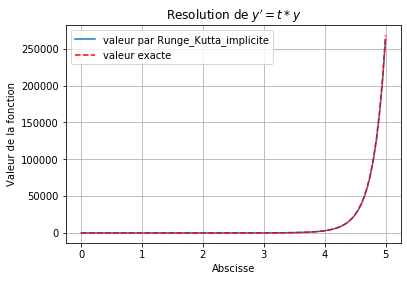

In [47]:
def f(t,y):
    return t*y

def Runge_Kutta_implicite(f,y0,t0,T,N):
    h=(T-t0)/N
    Y=[y0]
    X=[t0]
    t=t0
    y=y0
    while(t+h<=T):
        k1=f(t,y)
        k2=f(t+h/2,y+h*k1/2)
        k3=f(t+h/2,y+h*k2/2)
        k4=f(t+h/2,y+h*k3)
        y=y+h*(k1/6+k2/3+k3/3+k4/6)
        t=t+h
        Y.append(y)
        X.append(t)
    return (X,Y)
xx=Runge_Kutta_implicite(f,1,0,5,100)[0]
yy=Runge_Kutta_implicite(f,1,0,5,100)[1]
pl.plot(xx,yy,label="valeur par Runge_Kutta_implicite")
t=np.linspace(0,5,100)

y=odeint(f,[1],xx)
pl.plot(xx,y,'r--',label="valeur exacte")

pl.title("Resolution de $y'=t*y$")
pl.legend()
pl.grid()
pl.xlabel("Abscisse")
pl.ylabel("Valeur de la fonction")
pl.show()

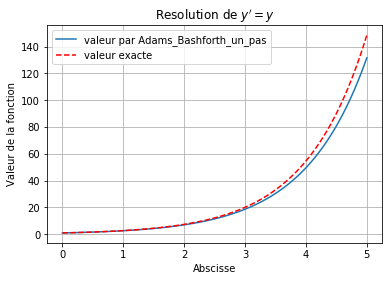

In [53]:
def f(t,y):
    return y

def Adams_Bashforth_un_pas(f,y0,t0,T,N):
    h=(T-t0)/N
    Y=[y0]
    X=[t0]
    t=t0
    y=y0
    while(t+h<=T):
        y=y+h*f(t,y)
        t=t+h
        Y.append(y)
        X.append(t)
    return (X,Y)
xx=Adams_Bashforth_un_pas(f,1,0,5,100)[0]
yy=Adams_Bashforth_un_pas(f,1,0,5,100)[1]
pl.plot(xx,yy,label="valeur par Adams_Bashforth_un_pas")

t=np.linspace(0,5,100)
pl.plot(t,np.exp(t),'r--',label="valeur exacte")

pl.title("Resolution de $y'=y$")
pl.legend()
pl.grid()
pl.xlabel("Abscisse")
pl.ylabel("Valeur de la fonction")
pl.show()

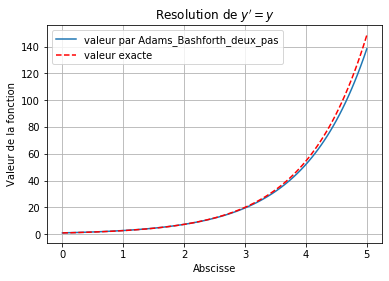

In [54]:
def f(t,y):
    return y

def Adams_Bashforth_deux_pas(f,y0,t0,T,N):
    h=(T-t0)/N
    Y=[y0]
    X=[t0]
    t=t0
    y=y0
    while(t+h<=T):
        y1=y+h*f(t,y)
        y2=y1+h*((3/2)*f(t+h,y1)-(1/2)*f(t,y))
        t=t+h
        Y.append(y2)
        X.append(t)
        y=y1
        y1=y2
    return (X,Y)
xx=Adams_Bashforth_deux_pas(f,1,0,5,100)[0]
yy=Adams_Bashforth_deux_pas(f,1,0,5,100)[1]
pl.plot(xx,yy,label="valeur par Adams_Bashforth_deux_pas")

t=np.linspace(0,5,100)
pl.plot(t,np.exp(t),'r--',label="valeur exacte")

pl.title("Resolution de $y'=y$")
pl.legend()
pl.grid()
pl.xlabel("Abscisse")
pl.ylabel("Valeur de la fonction")
pl.show()

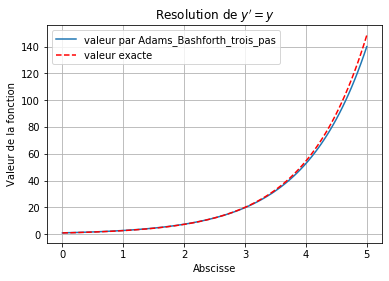

In [55]:
def f(t,y):
    return y

def Adams_Bashforth_trois_pas(f,y0,t0,T,N):
    h=(T-t0)/N
    Y=[y0]
    X=[t0]
    t=t0
    y=y0
    while(t+h<=T):
        y1=y+h*f(t,y)
        y2=y1+h*f(t+h,y1)
        y3=y2+(h/12)*(23*f(t+2*h,y2)-16*f(t+h,y1)-5*f(t,y))

        t=t+h
        Y.append(y3)
        X.append(t)
        
        y=y1
        y1=y2
        y2=y3
        
    return (X,Y)
xx=Adams_Bashforth_trois_pas(f,1,0,5,100)[0]
yy=Adams_Bashforth_trois_pas(f,1,0,5,100)[1]
pl.plot(xx,yy,label="valeur par Adams_Bashforth_trois_pas")

t=np.linspace(0,5,100)
pl.plot(t,np.exp(t),'r--',label="valeur exacte")

pl.title("Resolution de $y'=y$")
pl.legend()
pl.grid()
pl.xlabel("Abscisse")
pl.ylabel("Valeur de la fonction")
pl.show()

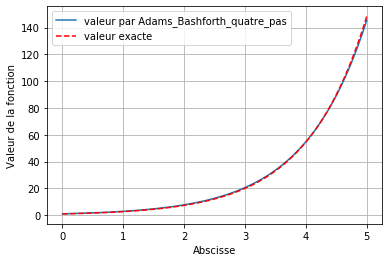

In [56]:
def f(t,y):
    return y

def Adams_Bashforth_quatre_pas(f,y0,t0,T,N):
    h=(T-t0)/N
    Y=[y0]
    X=[t0]
    t=t0
    y=y0
    while(t+h<=T):
        y1=y+h*f(t,y)
        y2=y1+h*f(t+h,y1)
        y3=y2+h*f(t+2*h,y2)
        y4=y2+(h/24)*(55*f(t+3*h,y3)-59*f(t+2*h,y2)+37*f(t+h,y1)+-9*f(t,y))
        
        
        t=t+h   
    
        Y.append(y4)
        X.append(t)
        
        y=y1
        y1=y2
        y2=y3
        y3=y4
        
    return (X,Y)
xx=Adams_Bashforth_quatre_pas(f,1,0,5,100)[0]
yy=Adams_Bashforth_quatre_pas(f,1,0,5,100)[1]
pl.plot(xx,yy,label="valeur par Adams_Bashforth_quatre_pas")

t=np.linspace(0,5,100)
pl.plot(t,np.exp(t),'r--',label="valeur exacte")


pl.legend()
pl.grid()
pl.xlabel("Abscisse")
pl.ylabel("Valeur de la fonction")
pl.show()

# On peut remarquer que plus le pas de la methode d'Adams_Bashforth augmente plus la précision aussi

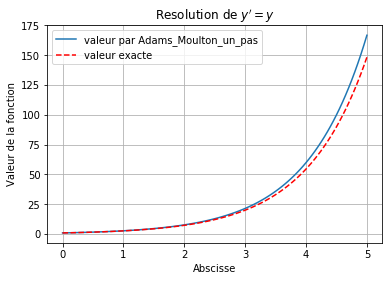

In [58]:
def f(t,y):
    return y

def Adams_Moulton_un_pas(f,y0,t0,T,N):
    return Crank_Nicholson(f,y0,t0,T,N)


xx=Adams_Moulton_un_pas(f,1,0,5,100)[0]
yy=Adams_Moulton_un_pas(f,1,0,5,100)[1]
pl.plot(xx,yy,label="valeur par Adams_Moulton_un_pas")

t=np.linspace(0,5,100)
pl.plot(t,np.exp(t),'r--',label="valeur exacte")

pl.title("Resolution de $y'=y$")
pl.legend()
pl.grid()
pl.xlabel("Abscisse")
pl.ylabel("Valeur de la fonction")
pl.show()

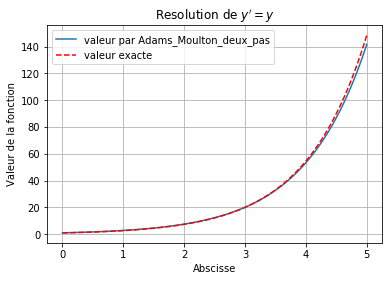

In [61]:
def f(t,y):
    return y

def Adams_Moulton_deux_pas(f,y0,t0,T,N):
    h=(T-t0)/N
    Y=[y0]
    X=[t0]
    t=t0
    y=y0
    while(t+h<=T):
        y1=y+h*f(t,y)
        k=y1+h*f(t+h,y1)
        y2=y1+(h/12)*((3/2)*(5*f(t+2*h,k)+8*f(t+h,y1)-f(t,y)))
        t=t+h
        Y.append(y2)
        X.append(t)
        y=y1
        y1=k
    return (X,Y)


xx=Adams_Moulton_deux_pas(f,1,0,5,100)[0]
yy=Adams_Moulton_deux_pas(f,1,0,5,100)[1]
pl.plot(xx,yy,label="valeur par Adams_Moulton_deux_pas")

t=np.linspace(0,5,100)
pl.plot(t,np.exp(t),'r--',label="valeur exacte")

pl.title("Resolution de $y'=y$")
pl.legend()
pl.grid()
pl.xlabel("Abscisse")
pl.ylabel("Valeur de la fonction")
pl.show()

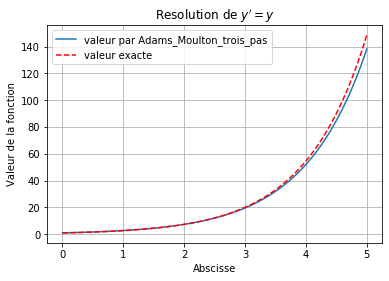

In [63]:
def f(t,y):
    return y

def Adams_Moulton_trois_pas(f,y0,t0,T,N):
    h=(T-t0)/N
    Y=[y0]
    X=[t0]
    t=t0
    y=y0
    while(t+h<=T):
        y1=y+h*f(t,y)
        y2=y1+h*f(t+h,y1)
        k=y2+h*f(t+h,y2)
        y3=y2+(h/24)*(9*f(t+3*h,k)+19*f(t+2*h,y2)-5*f(t+h,y1)+f(t,y))
        t=t+h
        Y.append(y2)
        X.append(t)
        y=y1
        y1=y2
    return (X,Y)


xx=Adams_Moulton_trois_pas(f,1,0,5,100)[0]
yy=Adams_Moulton_trois_pas(f,1,0,5,100)[1]
pl.plot(xx,yy,label="valeur par Adams_Moulton_trois_pas")

t=np.linspace(0,5,100)
pl.plot(t,np.exp(t),'r--',label="valeur exacte")

pl.title("Resolution de $y'=y$")
pl.legend()
pl.grid()
pl.xlabel("Abscisse")
pl.ylabel("Valeur de la fonction")
pl.show()

# Dans cette implementation suivis des exemples d'applications nous avons rencontrer des methodes avec plus de précisions et autres moins ce qui donne la possibilité à l'utilisateur un champ assez élargit selon son objectif à choisir une methode optimale qui biensure varie selon les études car le terme d'optimisation pour un ordinateur actuellement c'est la nation de temps d'exécution.

# Enfin aucour de cette implementation que ça soit de Black and Scholes où les methodes classiques, prémièrement je me suis plus familiarisé avec la discrétisation pour linéariser l'EDP de Black and Scholes suivis de son implementation et d'autres part j'ai appris des nouvelles fonctionnalités sur python.

# Merci pour votre Attention